Среднеквадратическое отклонение для линейного приближения: 0.02655805892547656
Среднеквадратическое отклонение для квадратичного приближения: 0.0037271554692880843
Среднеквадратическое отклонение для степенного приближения: 0.005146348870250496


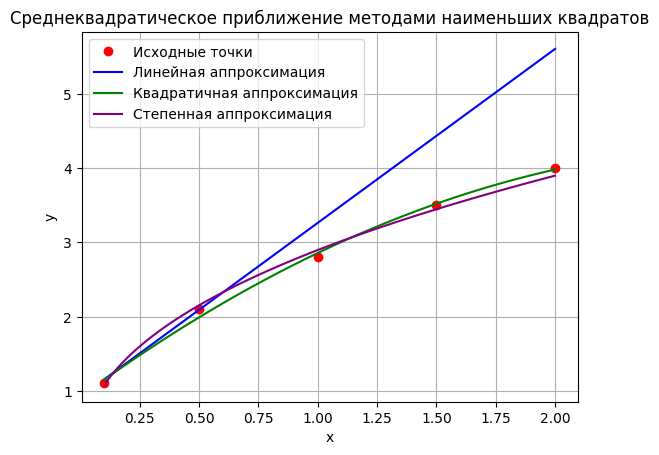

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Задание произвольных точек
x = np.array([0.1, 0.5, 1, 1.5, 2])
y = np.array([1.1, 2.1, 2.8, 3.5, 4.0])

# Линейное приближение y = a0 + a1 * x
def linear_approx(x, y):
    A = np.vstack([np.ones_like(x), x]).T
    a0, a1 = np.linalg.lstsq(A, y, rcond=None)[0]
    return a0, a1

# Квадратичное приближение y = a0 + a1 * x + a2 * x^2
def quadratic_approx(x, y):
    A = np.vstack([np.ones_like(x), x, x**2]).T
    a0, a1, a2 = np.linalg.lstsq(A, y, rcond=None)[0]
    return a0, a1, a2

# Степенное приближение y = a * x^b
def power_approx(x, y):
    log_x = np.log(x)
    log_y = np.log(y)
    A = np.vstack([np.ones_like(log_x), log_x]).T
    c0, c1 = np.linalg.lstsq(A, log_y, rcond=None)[0]
    a = np.exp(c0)
    b = c1
    return a, b

# Среднеквадратичное отклонение
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Вычисление приближений
a0, a1 = linear_approx(x, y)
y_linear = a0 + a1 * x

a0, a1, a2 = quadratic_approx(x, y)
y_quadratic = a0 + a1 * x + a2 * x**2

a, b = power_approx(x, y)
y_power = a * x**b

# Вычисление отклонений
mse_linear = mse(y, y_linear)
mse_quadratic = mse(y, y_quadratic)
mse_power = mse(y, y_power)

# Вывод результатов
print(f"Среднеквадратическое отклонение для линейного приближения: {mse_linear}")
print(f"Среднеквадратическое отклонение для квадратичного приближения: {mse_quadratic}")
print(f"Среднеквадратическое отклонение для степенного приближения: {mse_power}")

# Построение графиков
x_vals = np.linspace(min(x), max(x), 100)
y_linear_vals = a0 + a1 * x_vals
y_quadratic_vals = a0 + a1 * x_vals + a2 * x_vals**2
y_power_vals = a * x_vals**b

plt.plot(x, y, 'ro', label='Исходные точки')
plt.plot(x_vals, y_linear_vals, label='Линейная аппроксимация', color='blue')
plt.plot(x_vals, y_quadratic_vals, label='Квадратичная аппроксимация', color='green')
plt.plot(x_vals, y_power_vals, label='Степенная аппроксимация', color='purple')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Среднеквадратическое приближение методами наименьших квадратов')
plt.grid(True)
plt.show()
